# Осциллятор без внешнего воздействия

## Френкель

$g_e = 0$

In [1]:
import numpy as np
import math as mp
import matplotlib as mpl
import matplotlib.pyplot as plt
import qutip
from tqdm import trange, notebook
from time import sleep
from odeintw import odeintw
from pylab import *
from matplotlib import cm

#  define system of motion equations 
def func_osc(z, t):
    p, q = z
    return [-w**2 * q, p]


#  initial conditions
#-----------------------
w = 1                  #  photonic field frequency
w2 = w                 #  qubit frequency
T = 2 * np.pi / w      #  period 

q0 = 1                 #  initial coordinate
p0 = 1                 #  initial impulse

print('T = ', T)


z0 = [p0, q0]

sol = odeintw(func_osc, z0, np.linspace(0, 100, 100), atol=1e-12, rtol=1e-10, mxstep=5000000)

p = sol[:,0]
q = sol[:,1]
print(q)

T =  6.283185307179586
[ 1.          1.37866074  0.46627513 -0.88275366 -1.4051281  -0.61167084
  0.75458536  1.41421037  0.74949859 -0.61708088 -1.40579518 -0.87805309
  0.4719415   1.37998664  0.99574379 -0.32096297 -1.33710408 -1.10111455
  0.1660133   1.27767806  1.19286166 -0.00900961 -1.20244383 -1.26984996
 -0.14810555  1.11233225  1.33112691  0.30338826 -1.00845822 -1.37593437
 -0.45491727  0.89210694  1.40371793  0.60081777 -0.76471798 -1.41413384
 -0.73928458  0.62786746  1.40705324  0.86860453 -0.48324859 -1.38256374
 -0.98717757  0.33265067  1.34096832  1.09353666 -0.17793701 -1.28278163
 -1.18636586  0.02102179  1.20872359  1.26451662  0.13615351 -1.1197105
 -1.32702202 -0.29164425  1.01684368  1.37310871  0.44352658 -0.90139585
 -1.40220646 -0.58992134  0.77479541  1.41395528  0.72901723 -0.63860874
 -1.40820979 -0.85909329  0.49452081  1.38504107  0.97854012 -0.34431438
 -1.3447358  -1.08587987  0.18984787  1.28779264  1.17978446 -0.03303246
 -1.21491614 -1.25909204 -0.1

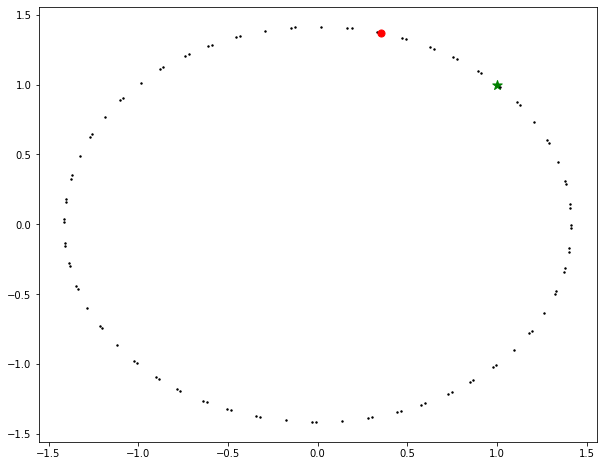

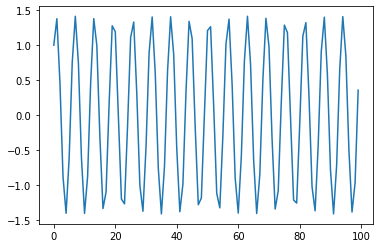

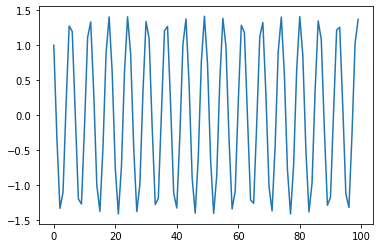

In [2]:
plt.figure(figsize=(10,8))
plt.scatter(np.real(q)[0], np.real(p)[0], marker='*', c='green', s=100)
plt.scatter(np.real(q)[1:-2], np.real(p)[1:-2], s=2, c='black')
plt.scatter(np.real(q)[-1], np.real(p)[-1], marker='o', c='red', s=50)
#plt.plot(np.real(x), np.real(p), '-', lw= 0.2, c='k')
plt.show()

plt.plot(q)
plt.show()


plt.plot(p)
plt.show()

## Квантовая задача

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from numpy import linalg
from scipy.linalg import expm as expmm


wc = 1.0  # cavity frequency
wa = 1.0  # atom frequency
#g  = 0.0 * 2 * np.pi  # coupling strength

N = 900             # number of cavity fock states
use_rwa = True

Time = np.linspace(0, 100, 100)
x = 1
p = 1
alpha0 = (1j*p + x) / np.sqrt(2)
#g = np.sqrt(2*wc)*g
# operators
a  = destroy(N)
# Hamiltonian
if use_rwa:
    H = wc * a.dag() * a
else:
    H = wc * a.dag() * a
#print(H)
#print(Hk)
start = coherent(N,alpha0)

ava = []

for t in notebook.tqdm(Time):
    rho = ket2dm(start)
    dotrho = (1j*H*t).expm()*rho*(-1j*H*t).expm()
    ava.append((dotrho*destroy(N)).tr())
avada = np.conj(ava)
x = (ava + avada)/np.sqrt(2)
p = (avada - ava)*1j/np.sqrt(2)

  0%|          | 0/100 [00:00<?, ?it/s]

[ 1.        +0.j -0.31511038+0.j -1.33513576+0.j -1.10487374+0.j
  0.1600469 +0.j  1.27509168+0.j  1.19607731+0.j -0.00300322+0.j
 -1.19927139+0.j -1.27248229+0.j -0.15407761+0.j  1.10861299+0.j
  1.33314336+0.j  0.30925211+0.j -1.00423817+0.j -1.37730998+0.j
 -0.46060035+0.j  0.8874383 +0.j  1.40443568+0.j  0.60624977+0.j
 -0.75965852+0.j -1.41418486+0.j -0.7443983 +0.j  0.62247978+0.j
  1.4064369 +0.j  0.87333669+0.j -0.47759935+0.j -1.38128765+0.j
 -0.99146962+0.j  0.32680977+0.j  1.33904827+0.j  1.0973355 +0.j
 -0.1719767 +0.j -1.28024139+0.j -1.18962449+0.j  0.01501584+0.j
  1.20559459+0.j  1.26719472+0.j  0.14213081+0.j -1.11603144+0.j
 -1.32908645+0.j -0.29751894+0.j  1.01266008+0.j  1.37453393+0.j
  0.44922597+0.j -0.89675948+0.j -1.40297485+0.j -0.59537492+0.j
  0.76976364+0.j  1.41405731+0.j  0.73415753+0.j -0.63324381+0.j
 -1.40764421+0.j -0.8638567 +0.j  0.48888911+0.j  1.38381488+0.j
  0.98286771+0.j -0.33848558+0.j -1.34286417+0.j -1.08971809+0.j
  0.1838941 +0.j  1.28529

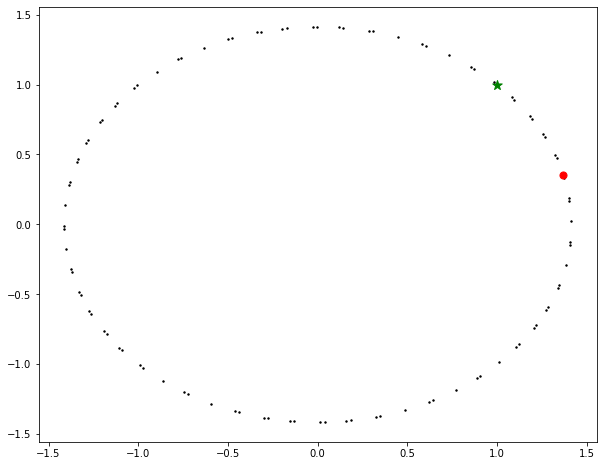

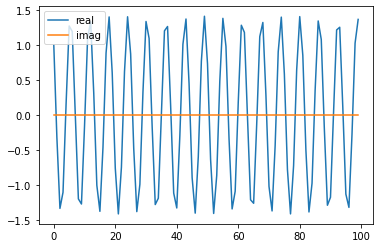

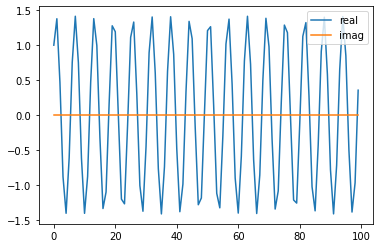

In [5]:
print(x)
#print(p)

plt.figure(figsize=(10,8))
plt.scatter(np.real(x)[0], np.real(p)[0], marker='*', c='green', s=100)
plt.scatter(np.real(x)[1:-2], np.real(p)[1:-2], s=2, c='black')
plt.scatter(np.real(x)[-1], np.real(p)[-1], marker='o', c='red', s=50)
#plt.plot(np.real(x), np.real(p), '-', lw= 0.2, c='k')
plt.show()

plt.plot(np.real(x), label='real')
plt.plot(np.imag(x), label='imag')
plt.legend()
plt.show()

plt.plot(np.real(p), label='real')
plt.plot(np.imag(p), label='imag')
plt.legend()
plt.show()

# Кубит

## Френкель

In [6]:
#  define system of motion equations 
def func_qub(z, t):
    u, v = z
    return [((w2 / 2) * u)/1j, (-(w2 / 2) * v)/1j]



#  initial conditions
#-----------------------
w = 1                  #  photonic field frequency
w2 = w                 #  qubit frequency
T = 2 * np.pi / w      #  period 

u0 = np.sqrt(1/2) + 0*1j    #  initial spinor component U
v0 = np.sqrt(1/2) + 0*1j     #  initial spinor component V

print('T = ', T)

z0 = [u0, v0]

sol = odeintw(func_qub, z0, np.linspace(0, 100, 100), atol=1e-12, rtol=1e-10, mxstep=5000000)

u = sol[:,0]
v = sol[:,1]
print(v)

T =  6.283185307179586
[ 0.70710678+0.j          0.61882453+0.34213478j  0.37602184+0.59883852j
  0.03932652+0.70601234j -0.30718862+0.63689493j -0.57699879+0.4087449j
 -0.70273241+0.07853131j -0.65299379-0.27129155j -0.44020268-0.55337293j
 -0.11749299-0.69727713j  0.23455469-0.66707129j  0.52803408-0.47029779j
  0.6896634 -0.15609098j  0.67908383+0.19709174j  0.49893707+0.50106067j
  0.19420577+0.67991479j -0.1590187 +0.68899423j -0.47253621+0.52603187j
 -0.66806147+0.23171939j -0.69677183-0.1204534j  -0.55149832-0.44254899j
 -0.26851572-0.65414013j  0.08151523-0.70239253j  0.41119184-0.57525757j
  0.63819387-0.30448084j  0.70583895+0.04232473j  0.59723609+0.37856182j
  0.33950343+0.62027206j -0.00300322+0.7071004j  -0.34475995+0.61736584j
 -0.60043016+0.37347507j -0.706173  +0.0363276j  -0.6355845 -0.30989086j
 -0.40629059-0.5787296j  -0.07554596-0.70305961j  0.27406249-0.65183568j
  0.55523756-0.43784843j  0.69776986-0.11453047j  0.66606907+0.23738575j
  0.46805089+0.53002676j  0.1

/usr/local/lib/python3.8/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


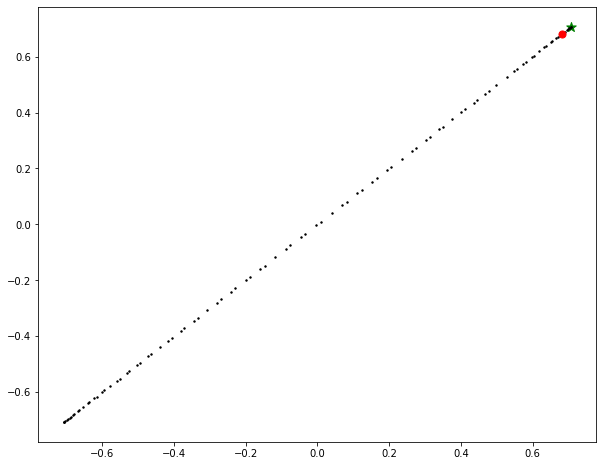

/usr/local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


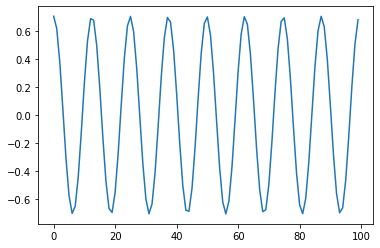

/usr/local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


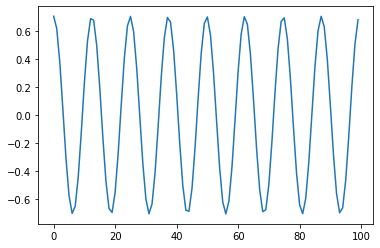

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(u[0], v[0], marker='*', c='green', s=100)
plt.scatter(u[1:-2], v[1:-2], s=2, c='black')
plt.scatter(u[-1], v[-1], marker='o', c='red', s=50)
#plt.plot(np.real(x), np.real(p), '-', lw= 0.2, c='k')
plt.show()

plt.plot(u)
plt.show()


plt.plot(v)
plt.show()

## Квантовая задача

In [8]:
wc = 1.0  # cavity frequency
wa = 1.0  # atom frequency
#g  = 0.0 * 2 * np.pi  # coupling strength

use_rwa = True

Time = np.linspace(0, 100, 1000)
#g = np.sqrt(2*wc)*g
# operators
a  = destroy(N)
# Hamiltonian
if use_rwa:
    H = wa * sigmaz()/2
else:
    H = wc * a.dag() * a
#print(H)
#print(Hk)
start = np.sqrt(1/2)*basis(2, 0) + np.sqrt(1/2)*basis(2, 1)

sm = []

for t in notebook.tqdm(Time):
    rho = ket2dm(start)
    dotrho = (1j*H*t).expm()*rho*(-1j*H*t).expm()
    sm.append(dotrho*sigmam())

  0%|          | 0/1000 [00:00<?, ?it/s]

In [9]:
avsm = [expect(sm[i],start) for i in range(len(sm))]
avsp = np.conj(avsm)

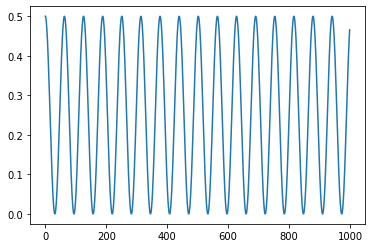

/usr/local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


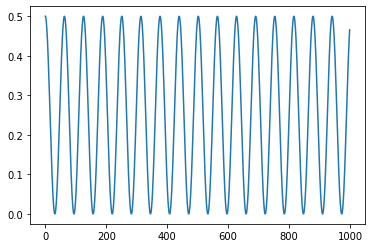

In [10]:
plt.plot(avsm)
plt.show()
plt.plot(avsp)
plt.show()

/usr/local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


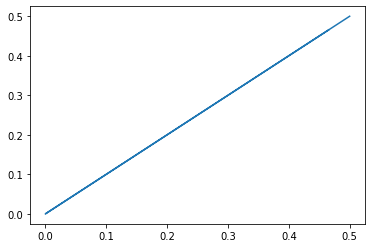

In [11]:
plt.plot(avsm, avsp)

# Внешнее воздействие на кубит

## Френкель

In [29]:
#  define system of motion equations 
def func_qub(z, t):
    u, v = z
    return [((w2 / 2) * u)/1j, (-(w2 / 2) * v)/1j]



#  initial conditions
#-----------------------
w = 1                  #  photonic field frequency
w2 = w                 #  qubit frequency
r = 1/3                #  frequency ratio
Tk = 2 * r * np.pi / w #  period of an external driving force 

ge = 0.0              #  coupling parameter
phi = 0.1             #  external driving force amplitude


u0 = np.sqrt(0/2) + 0j     #  initial spinor component U
v0 = np.sqrt(2/2) + 0j     #  initial spinor component V

n_steps = 200       #  number of periods

print('Tk = ', Tk)
print('T = ', 2 * np.pi / w)

    
U = np.zeros(n_steps + 1, dtype=complex)   
V = np.zeros(n_steps + 1, dtype=complex)

U[0] = u0
V[0] = v0

mxsteps = n_steps  #  step number in solving diff. equation

if n_steps <= 1000:
    mxsteps = 1000

#  mapping for (p, q, u, v)
for n in notebook.tqdm(range(1, n_steps + 1)):

    tn = Tk * (n - 1)
  
    u01 = np.cos(phi) * U[n - 1] - 1j * np.sin(phi) * V[n - 1]
    v01 = -1j * np.sin(phi) * U[n - 1] + np.cos(phi) * V[n - 1]
    
    z0 = [u01, v01]

    sol = odeintw(func_qub, z0, [tn ,tn + Tk], atol=1e-12, rtol=1e-10, mxstep=5000000)
    #print(sol)
    U[n] = sol[-1,0]
    V[n] = sol[-1,1]
print(U)
print(V)

Tk =  2.0943951023931953
T =  6.283185307179586


  0%|          | 0/200 [00:00<?, ?it/s]

[ 0.        +0.j         -0.08645827-0.04991671j -0.08602634-0.04966733j
  0.0008617 +0.00049751j  0.08688374+0.05016235j  0.08558798+0.04941424j
 -0.00172334-0.00099497j -0.08730272-0.05040425j -0.08514322-0.04915746j
  0.00258486+0.00149237j  0.08771517+0.05064237j  0.0846921 +0.04889701j
 -0.00344617-0.00198965j -0.08812106-0.05087672j -0.08423464-0.04863289j
  0.00430724+0.00248678j  0.08852036+0.05110725j  0.08377089+0.04836515j
 -0.00516797-0.00298373j -0.08891305-0.05133397j -0.08330088-0.04809378j
  0.00602833+0.00348046j  0.08929909+0.05155685j  0.08282464+0.04781883j
 -0.00688823-0.00397692j -0.08967845-0.05177588j -0.08234221-0.0475403j
  0.00774761+0.00447309j  0.09005112+0.05199104j  0.08185362+0.04725821j
 -0.00860642-0.00496892j -0.09041705-0.05220231j -0.08135892-0.04697259j
  0.00946459+0.00546438j  0.09077622+0.05240967j  0.08085813+0.04668346j
 -0.01032204-0.00595943j -0.09112861-0.05261313j -0.0803513 -0.04639084j
  0.01117873+0.00645404j  0.09147418+0.05281264j  0.

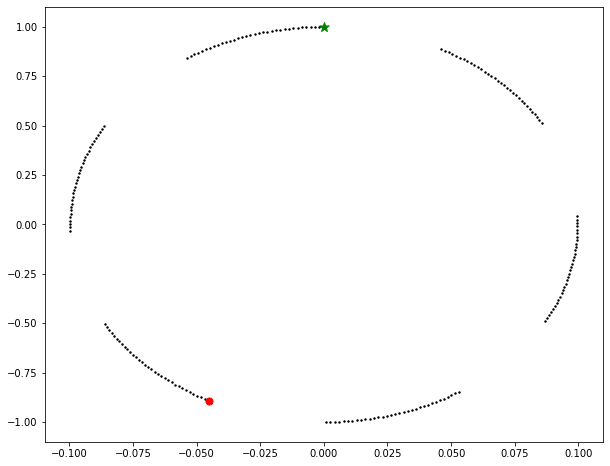

/usr/local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


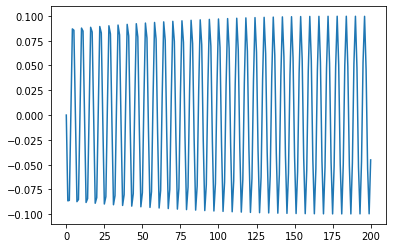

/usr/local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


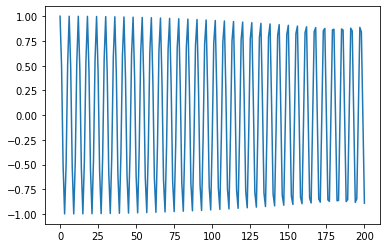

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(U[0], V[0], marker='*', c='green', s=100)
plt.scatter(U[1:-2], V[1:-2], s=2, c='black')
plt.scatter(U[-1], V[-1], marker='o', c='red', s=50)
#plt.plot(np.real(x), np.real(p), '-', lw= 0.2, c='k')
plt.show()

plt.plot(U)
plt.show()


plt.plot(V)
plt.show()

## Квантовая задача

In [31]:
wc = 1.0  # cavity frequency
wa = 1.0  # atom frequency
#g  = 0.0 * 2 * np.pi  # coupling strength

mu = 0.1j
d = 1

use_rwa = True


r = 1/3             #  frequency ratio
Tk = 2 * r * np.pi / w #  period of an external driving force 

#g = np.sqrt(2*wc)*g
# operators
a  = destroy(N)
# Hamiltonian
if use_rwa:
    H = wa * sigmaz()/2
else:
    H = wc * a.dag() * a
#print(H)
#print(Hk)
Hk = (np.conj(mu)*sigmap() + mu*sigmam())
#Hk = mu*sigmax()
start = np.sqrt(2/2)*basis(2, 1) + np.sqrt(0/2)*basis(2, 0)

sm = []
vec = []
nT = 200


for n in notebook.tqdm(range(nT)):
    rho = ket2dm(start)
    dotrho = (1j*H*Tk*n*d + 1j*Hk*n).expm()*rho*(-1j*Hk*n - 1j*H*Tk*n*d).expm()
    psi = (-1j*H*Tk*n*d - 1j*Hk*n).expm()*start
    sm.append(dotrho*sigmam())
    vec.append(psi)
avsm = [expect(sm[i],start) for i in range(len(sm))]
avsp = np.conj(avsm)

  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.8/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


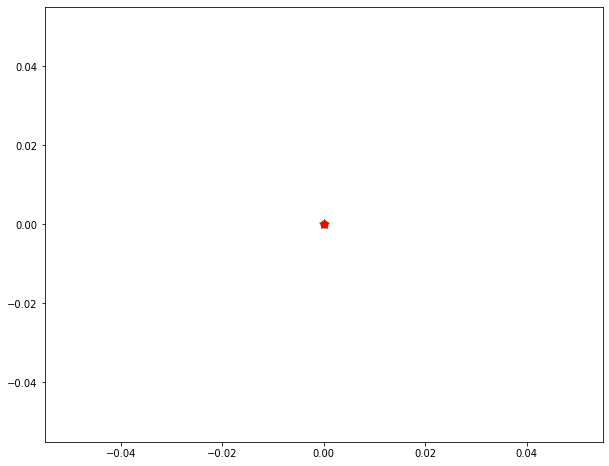

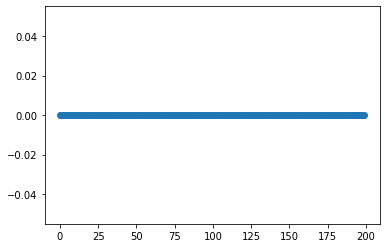

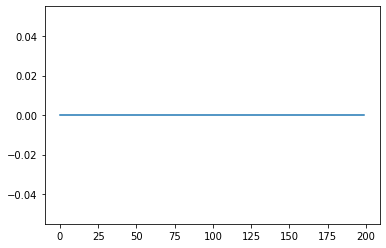

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(avsm[0], avsp[0], marker='*', c='green', s=100)
plt.scatter(avsm[1:-2], avsp[1:-2], s=2, c='black')
plt.scatter(avsm[-1], avsp[-1], marker='o', c='red', s=50)
#plt.plot(np.real(x), np.real(p), '-', lw= 0.2, c='k')

plt.show()
plt.plot(np.real(avsm), 'o-')
#plt.plot(np.imag(avsm))
plt.show()
plt.plot(np.real(avsp))
#plt.plot(np.imag(avsp))
plt.show()

/usr/local/lib/python3.8/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


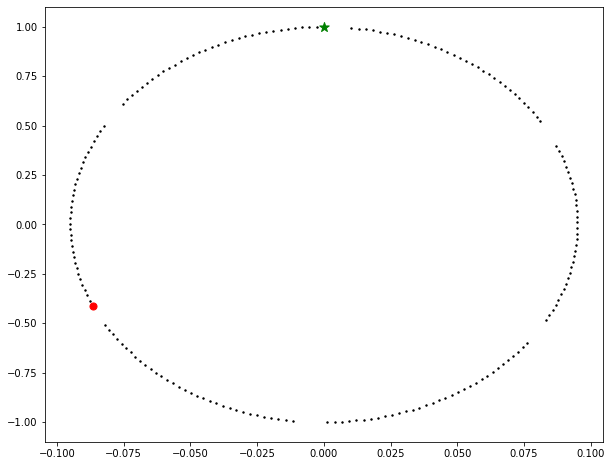

In [33]:
u = [np.complex(vec[i][0]) for i in range(len(vec))]
v = [np.complex(vec[i][1]) for i in range(len(vec))]

plt.figure(figsize=(10,8))
plt.scatter(u[0], v[0], marker='*', c='green', s=100)
plt.scatter(u[1:-2], v[1:-2], s=2, c='black')
plt.scatter(u[-1], v[-1], marker='o', c='red', s=50)
plt.show()

/usr/local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


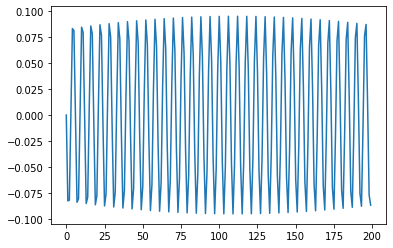

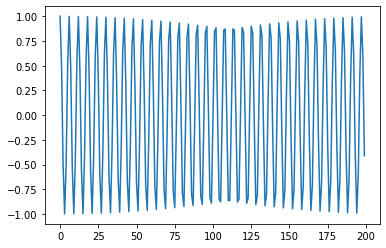

In [34]:
plt.plot(u)
plt.show()
plt.plot(v)